<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

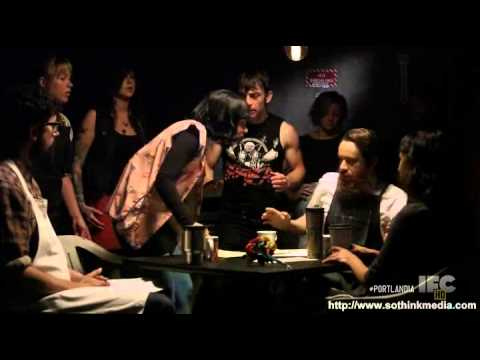

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/terrence/repos/lambda/unit_4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [212]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
from collections import Counter

from textblob import TextBlob

nlp = spacy.load("en_core_web_lg")

In [66]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"


df = pd.read_csv(url)

shops = df.copy()

In [182]:
df.shape

(7616, 3)

In [67]:
def splice_or_create(df, series, n, newcolumn=False, new_column_name=''):
    
    '''
    df = dataframe variable name
    
    series = df series we want to splice
    
    n = the index of the each element to splice for the series (only works for consistant format)
    
    newcolumn = bool if you want to create a new column witht the splice
    
    new_column_name = name of new column id newcolumn == true
    '''
    
    if type(df[series].iloc[0]) == str:

        if newcolumn == True:
            df[new_column_name] = df[series].apply(lambda x: x[:n])

        df[series] = df[series].apply(lambda x: x[n:])
    
    else:
        print('series must contain string type')
    
    return df

In [68]:
# Start here 
shops = splice_or_create(shops, 'full_review_text', 11, newcolumn=True, new_column_name='review_date')

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('[^a-zA-Z 0-9]', "", x))

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

shops['star_rating'] = shops['star_rating'].apply(lambda x: x.strip('star rating'))

shops['star_rating'] = shops['star_rating'].astype(float)

shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,1 checkin love love loved the atmosphere ever...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 checkin listed in brunch spots i loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating how...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 checkin they are located within the northcro...,4.0,12/3/2016


In [13]:
shops['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [14]:
shops['coffee_shop_name'].value_counts().sum()

7616

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [70]:
def tokenize(text):
    tokens = re.sub('[^a-zA-Z 0-9]', "", text)
    tokens = tokens.lower().split()
    tokens = tokens[1:]
    return tokens

In [69]:
shops2 = df.copy()

In [71]:
shops2['token'] = shops2['full_review_text'].apply(tokenize)

In [73]:
shops2.head()

,coffee_shop_name,full_review_text,star_rating,token
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1, checkin, they, are, located, within, the, ..."


In [74]:
from collections import Counter

word_count = Counter()

shops2['token'].apply(lambda x: word_count.update(x))

word_count.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [75]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [76]:
# Use the Function
wc = count(shops2['token'])

In [77]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
5,the,6847,34809,1.0,0.044975,0.044975,0.899028
38,and,6864,26650,2.0,0.034433,0.079408,0.901261
62,a,6246,22755,3.0,0.029401,0.108809,0.820116
19,i,5528,20237,4.0,0.026147,0.134957,0.725840
21,to,5653,17164,5.0,0.022177,0.157133,0.742253


<AxesSubplot:xlabel='rank', ylabel='cul_pct_total'>

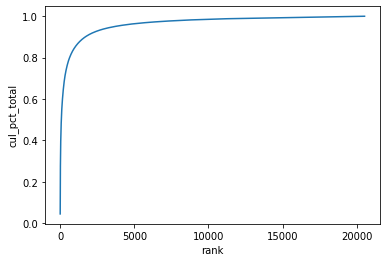

In [78]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

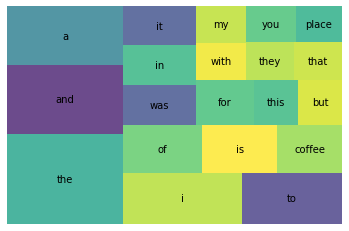

In [79]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [80]:
tokenizer = Tokenizer(nlp.vocab)

In [81]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_token = [token.text for token in doc]
    tokens.append(doc_token)
    
shops['spacy'] = tokens

shops['spacy']

0       [ , 1, checkin, love, love, loved, the, atmosp...
1       [listed, in, date, night, austin, ambiance, in...
2       [ , 1, checkin, listed, in, brunch, spots, i, ...
3       [ , very, cool, decor, good, drinks, nice, sea...
4       [1, checkin, they, are, located, within, the, ...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok, the, steeping, room, is, awesome, how, do...
7613    [loved, coming, here, for, tea, and, the, atmo...
7614    [he, food, is, just, average, the, booths, did...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: spacy, Length: 7616, dtype: object

In [95]:
STOP_WORDS = nlp.Defaults.stop_words
STOP_WORDS.add(" ")

In [96]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    
    tokens.append(doc_tokens)


In [97]:
shops['tokens_with_stop'] = tokens

In [98]:
shops['tokens_with_stop']

0       [1, checkin, love, love, loved, atmosphere, co...
1       [listed, date, night, austin, ambiance, austin...
2       [1, checkin, listed, brunch, spots, loved, ecl...
3       [cool, decor, good, drinks, nice, seating, ove...
4       [1, checkin, located, northcross, mall, shoppi...
                              ...                        
7611    [actually, step, restaurant, chance, favorites...
7612    [ok, steeping, room, awesome, great, menu, ite...
7613    [loved, coming, tea, atmosphere, pretty, fresh...
7614    [food, average, booths, didnt, feel, clean, wa...
7615    [finally, stopped, lunch, colleague, im, glad,...
Name: tokens_with_stop, Length: 7616, dtype: object

In [99]:
wc = count(shops['tokens_with_stop'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,coffee,4870,10344,1.0,0.028019,0.028019,0.639443
95,place,3658,5425,2.0,0.014695,0.042714,0.480305
154,good,2777,3958,3.0,0.010721,0.053435,0.364627
114,great,2807,3875,4.0,0.010496,0.063931,0.368566
151,like,2124,3088,5.0,0.008365,0.072296,0.278887


In [100]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
20433,roomier,1,1,20434.0,0.000003,0.999989,0.000131
20432,windowed,1,1,20435.0,0.000003,0.999992,0.000131
20434,actuality,1,1,20436.0,0.000003,0.999995,0.000131
20435,crass,1,1,20437.0,0.000003,0.999997,0.000131
20437,digestion,1,1,20438.0,0.000003,1.000000,0.000131


In [101]:
shops_bad = shops[shops['star_rating'].isin([1,2,3])]
shops_good = shops[shops['star_rating'].isin([4,5])]

In [102]:
def spacy_token_w_stop(df):

    tokens = []

    for doc in tokenizer.pipe(df):
        doc_tokens = []

        for token in doc:
            if token.text.lower() not in STOP_WORDS:
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)
    
    return tokens


In [103]:
shops_bad['tokens_w_stop'] = spacy_token_w_stop(shops_bad['full_review_text'])
shops_good['tokens_w_stop'] = spacy_token_w_stop(shops_good['full_review_text'])


<ipython-input-103-3794fc9a1889>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shops_bad['tokens_w_stop'] = spacy_token_w_stop(shops_bad['full_review_text'])
<ipython-input-103-3794fc9a1889>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shops_good['tokens_w_stop'] = spacy_token_w_stop(shops_good['full_review_text'])


In [104]:
wc_bad = count(shops_bad['tokens_w_stop'])
wc_good = count(shops_good['tokens_w_stop'])

In [105]:
wc_good.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,coffee,3932,8232,1.0,0.028608,0.028608,0.640391
95,place,2938,4313,2.0,0.014989,0.043597,0.478502
114,great,2464,3411,3.0,0.011854,0.055451,0.401303
184,good,2183,3084,4.0,0.010718,0.066168,0.355537
183,like,1559,2212,5.0,0.007687,0.073855,0.253909
43,austin,1547,1969,6.0,0.006843,0.080698,0.251954
31,love,1318,1718,7.0,0.005970,0.086668,0.214658
7,checkin,1600,1605,8.0,0.005578,0.092246,0.260586
164,friendly,1395,1458,9.0,0.005067,0.097313,0.227199
4,1,1393,1457,10.0,0.005063,0.102376,0.226873


In [106]:
wc_bad.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,coffee,938,2112,1.0,0.025937,0.025937,0.635501
33,place,720,1112,2.0,0.013656,0.039594,0.487805
8,like,565,876,3.0,0.010758,0.050352,0.382791
12,good,594,874,4.0,0.010734,0.061085,0.402439
61,food,309,483,5.0,0.005932,0.067017,0.209350
208,time,353,478,6.0,0.005870,0.072887,0.239160
119,great,343,464,7.0,0.005698,0.078586,0.232385
181,dont,351,447,8.0,0.005490,0.084075,0.237805
16,service,344,444,9.0,0.005453,0.089528,0.233062
121,im,312,439,10.0,0.005391,0.094919,0.211382


In [132]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,spacy,tokens_with_stop,sentiment
0,The Factory - Cafe With a Soul,1 checkin love love loved the atmosphere ever...,5.0,11/25/2016,"[ , 1, checkin, love, love, loved, the, atmosp...","[1, checkin, love, love, loved, atmosphere, co...","(0.3972222222222222, 0.75)"
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4.0,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[listed, date, night, austin, ambiance, austin...","(0.3678571428571429, 0.7285714285714285)"
2,The Factory - Cafe With a Soul,1 checkin listed in brunch spots i loved the ...,4.0,11/30/2016,"[ , 1, checkin, listed, in, brunch, spots, i, ...","[1, checkin, listed, brunch, spots, loved, ecl...","(0.02847222222222223, 0.6045138888888889)"
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating how...,2.0,11/25/2016,"[ , very, cool, decor, good, drinks, nice, sea...","[cool, decor, good, drinks, nice, seating, ove...","(0.14763888888888888, 0.5468055555555557)"
4,The Factory - Cafe With a Soul,1 checkin they are located within the northcro...,4.0,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, located, northcross, mall, shoppi...","(0.17159582841401025, 0.5099370326643053)"


In [120]:
shops['sentiment'] = shops['full_review_text'].apply(lambda x: TextBlob(x).sentiment)

In [135]:
shops_bad['sentiment'] = shops_bad['full_review_text'].apply(lambda x: TextBlob(x).sentiment[0])
shops_good['sentiment'] = shops_good['full_review_text'].apply(lambda x: TextBlob(x).sentiment[0])

<ipython-input-135-a2773ee67943>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shops_bad['sentiment'] = shops_bad['full_review_text'].apply(lambda x: TextBlob(x).sentiment[0])


In [137]:
shops_bad['sentiment'].mean()

0.12447276438749183

In [138]:
shops_good['sentiment'] = shops_good['full_review_text'].apply(lambda x: TextBlob(x).sentiment[0])

<ipython-input-138-b28a49330e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shops_good['sentiment'] = shops_good['full_review_text'].apply(lambda x: TextBlob(x).sentiment[0])


In [139]:
shops_good['sentiment'].mean()

0.3109660821818494

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


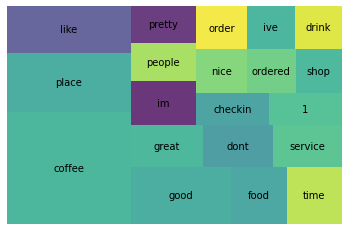

In [140]:
wc_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

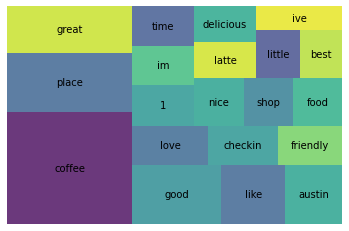

In [141]:
wc_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [187]:
scatter = shops.copy()
scatter.head()

,coffee_shop_name,full_review_text,star_rating,review_date,spacy,tokens_with_stop,sentiment
0,The Factory - Cafe With a Soul,1 checkin love love loved the atmosphere ever...,5.0,11/25/2016,"[ , 1, checkin, love, love, loved, the, atmosp...","[1, checkin, love, love, loved, atmosphere, co...","(0.3972222222222222, 0.75)"
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4.0,12/2/2016,"[listed, in, date, night, austin, ambiance, in...","[listed, date, night, austin, ambiance, austin...","(0.3678571428571429, 0.7285714285714285)"
2,The Factory - Cafe With a Soul,1 checkin listed in brunch spots i loved the ...,4.0,11/30/2016,"[ , 1, checkin, listed, in, brunch, spots, i, ...","[1, checkin, listed, brunch, spots, loved, ecl...","(0.02847222222222223, 0.6045138888888889)"
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating how...,2.0,11/25/2016,"[ , very, cool, decor, good, drinks, nice, sea...","[cool, decor, good, drinks, nice, seating, ove...","(0.14763888888888888, 0.5468055555555557)"
4,The Factory - Cafe With a Soul,1 checkin they are located within the northcro...,4.0,12/3/2016,"[1, checkin, they, are, located, within, the, ...","[1, checkin, located, northcross, mall, shoppi...","(0.17159582841401025, 0.5099370326643053)"


In [224]:
scatter['star_rating'] = scatter['star_rating'].astype(str)
scatter.loc[scatter['star_rating'].str.contains('1|2|3'), 'sub'] = 'low'
scatter.loc[scatter['star_rating'].str.contains('4|5'), 'sub'] = 'high'

In [226]:
import scattertext as st

corpus = st.CorpusFromPandas(
    scatter,
    category_col='sub',
    text_col='full_review_text',
    nlp=nlp).build()

In [227]:
html = st.produce_scattertext_explorer(
    corpus,
    category='high',
    category_name='High',
    not_category_name='Low',
    width_in_pixels=1000,
    metadata=scatter['full_review_text']
)

In [229]:
open('./coffee.html', 'w').write(html)

10426210

In [ ]:
with open('', 'w') as outf: outf.write(html)

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

